In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob
os.sys.path.append('../')
from utilities import *
from single_session_plots import *

from astropy.convolution import convolve, Gaussian1DKernel

import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
mouse = '4139190.1'

In [68]:
df = load_session_db()
#ca1mice = ['4139190.1','4139190.3', '4054011.1','4139202.2']
#dgmice = ['4054010.4','4054010.5']


df = df[df['RewardCount']>10]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse = df_mouse.sort_values(['DateTime'])
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,DateTime,data file,scanfile,scanmat
150,4139190.1,16_06_2018,2,TwoTower_Timeout,19,1,2018-06-16,G:\My Drive\\VR_Data\TwoTower\4139190.1\16_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\16_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\16_06_2...
210,4139190.1,19_06_2018,2,TwoTower_Timeout,75,1,2018-06-19,G:\My Drive\\VR_Data\TwoTower\4139190.1\19_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\19_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\19_06_2...
175,4139190.1,21_06_2018,3,TwoTower_Timeout,92,1,2018-06-21,G:\My Drive\\VR_Data\TwoTower\4139190.1\21_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...
177,4139190.1,21_06_2018,2,TwoTower_Timeout,20,1,2018-06-21,G:\My Drive\\VR_Data\TwoTower\4139190.1\21_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...
169,4139190.1,24_06_2018,2,TwoTower_Timeout,104,1,2018-06-24,G:\My Drive\\VR_Data\TwoTower\4139190.1\24_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...
173,4139190.1,25_06_2018,2,TwoTower_Timeout,62,1,2018-06-25,G:\My Drive\\VR_Data\TwoTower\4139190.1\25_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2...
205,4139190.1,27_06_2018,2,TwoTower_Timeout,81,1,2018-06-27,G:\My Drive\\VR_Data\TwoTower\4139190.1\27_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\27_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\27_06_2...
160,4139190.1,28_06_2018,8,TwoTower_Timeout,22,1,2018-06-28,G:\My Drive\\VR_Data\TwoTower\4139190.1\28_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...
164,4139190.1,28_06_2018,2,TwoTower_Timeout,17,1,2018-06-28,G:\My Drive\\VR_Data\TwoTower\4139190.1\28_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...
165,4139190.1,28_06_2018,9,TwoTower_Timeout,18,1,2018-06-28,G:\My Drive\\VR_Data\TwoTower\4139190.1\28_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...


In [103]:
sess = df_mouse.iloc[5]
sess

MouseName                                                4139190.1
DateFolder                                              25_06_2018
SessionNumber                                                    2
Track                                             TwoTower_Timeout
RewardCount                                                     62
Imaging                                                          1
DateTime                                       2018-06-25 00:00:00
data file        G:\My Drive\\VR_Data\TwoTower\4139190.1\25_06_...
scanfile         G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2...
scanmat          G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2...
Name: 173, dtype: object

G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat


..\utilities.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
..\utilities.py:611: RuntimeWarning: invalid value encountered in true_divide
  rzone_lick_ratio[m] = np.divide(zone0_lick_rate,zone0_lick_rate+zone1_lick_rate)
..\utilities.py:478: RuntimeW

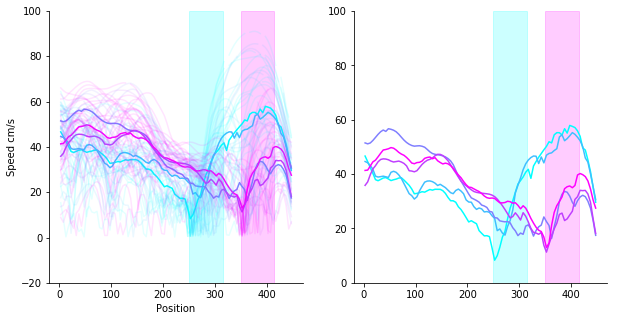

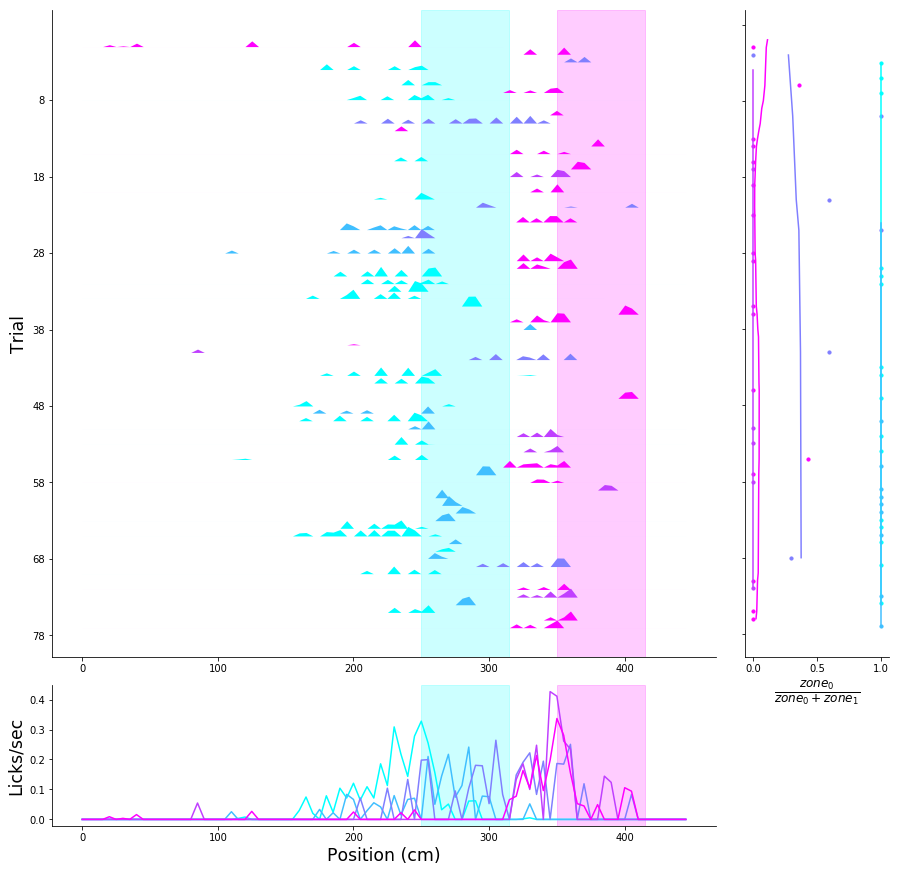

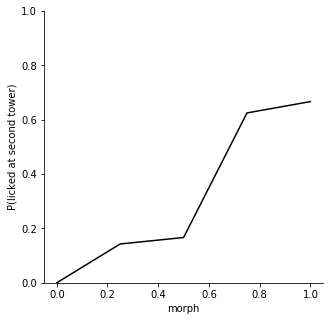

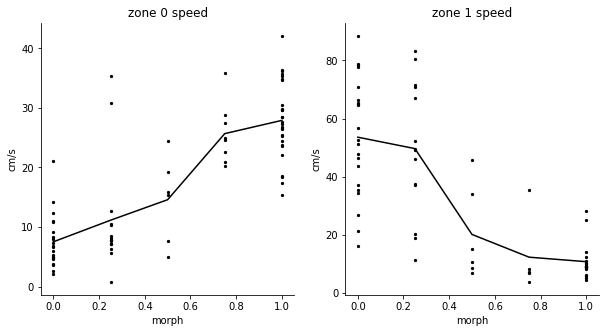

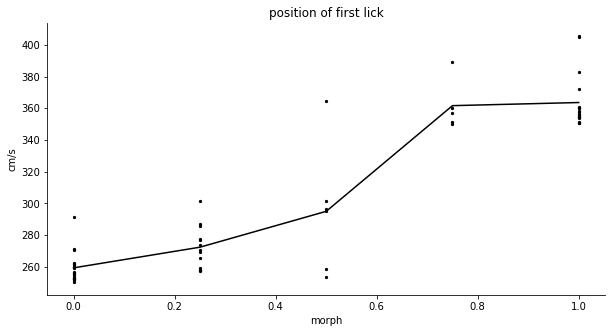

In [104]:
behav = behavior_dataframe(sess['data file'],sess['scanmat'],concat=False)
tmp = run_behavior(behav,ratio = True)

In [105]:
info = loadmat_sbx(sess['scanmat'])['info']
ca_dat = load_ca_mat(sess['scanfile'])

C = ca_dat['C_dec'][info['frame'][0]:info['frame'][-1]+1]
S = ca_dat['S_dec'][info['frame'][0]:info['frame'][-1]+1]

frame_diff = behav.shape[0]-C.shape[0]
if frame_diff>0:
    behav = behav.iloc[:-frame_diff]
    
    
C_z = sp.stats.zscore(C,axis=0)
S_z = sp.stats.zscore(S,axis=0)
S_z_smooth = gaussian_filter1d(S_z,3,axis=0)
S_smooth = gaussian_filter1d(S,3,axis=0)

G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
#subsystem#not made into numpy array


In [106]:
d= by_trial_info(behav,rzone0=(250,315),rzone1=(350,415))
morphs_u = np.sort(np.unique(d['morphs']))

pd,sid,maxIndsd = {},{},{}
for i,m in enumerate(morphs_u):
    mask = behav['morph']==m
    frmap, occupancy = rate_map(C[mask,:],behav.loc[mask,'pos'])
    si = spatial_info(frmap,occupancy)
    p = spatial_info_perm_test(si,C[mask,:],behav.loc[mask,'pos'],nperms = 100)
    maxInds = np.argmax(frmap,axis=0)
    p_mask = np.argsort(maxInds)
    p_mask = p_mask[p>.95]
    
    pd[m]=p
    sid[m]=si
    maxIndsd[m]=maxInds    


..\utilities.py:478: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


..\single_session_plots.py:272: RuntimeWarning: invalid value encountered in true_divide
  frmap_norm[:,j]= gaussian_filter1d(frmap[:,j],2)/frmap[:,j].sum()


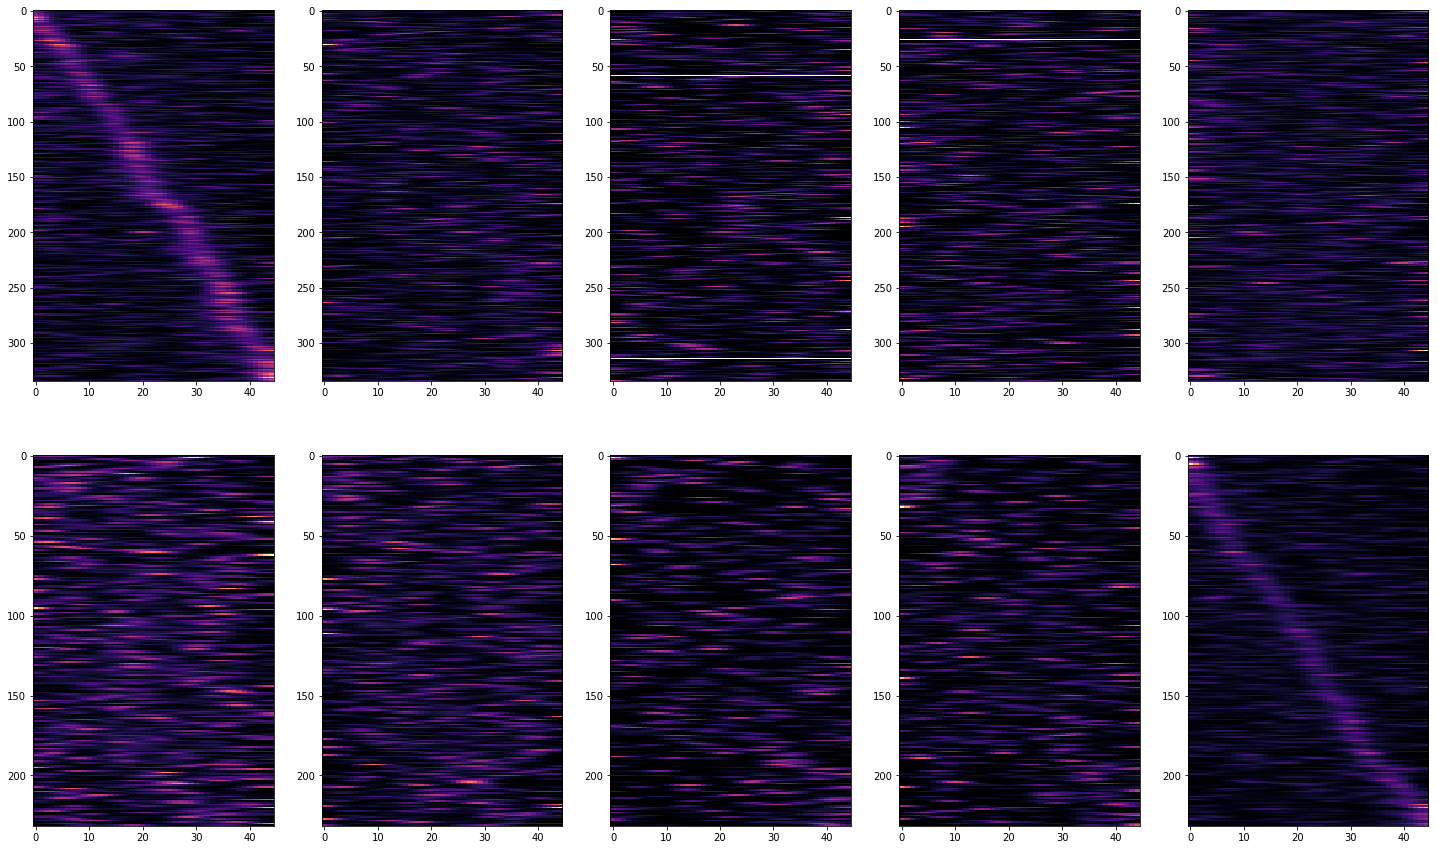

In [107]:
run_placecells(S,behav)

In [108]:
rzone0=(250,315)
rzone1=(350,415)




(1687, 5)


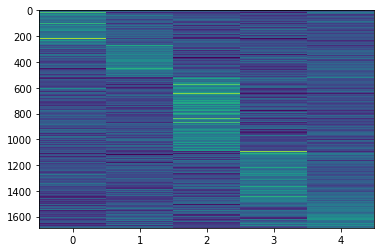

In [109]:
# engram selectivity

# for each morph
cs = {}
for i,m in enumerate(morphs_u):
    mask = behav['morph']==m
    cs[m] = np.divide(C[mask,:].mean(axis=0),C.mean(axis=0))

CS = np.concatenate([np.expand_dims(cs[m],1) for m in cs.keys()],axis=1)
# find ratio of average activity in that morph vs total activity
print(CS.shape)
maxInds = np.argmax(CS,axis=1)
csSort = np.argsort(maxInds)
CS_norm = CS
for i in range(CS.shape[0]):
    CS_norm[i,:] = CS[i,:]/np.sum(CS[i,:])

f,ax = plt.subplots()
ax.imshow(CS_norm[csSort,:],aspect='auto')



(45, 1687)
(45, 1687)
(45, 1687)
(45, 1687)
(45, 1687)
(45, 1687)
(45, 1687)
(45, 1687)
(45, 1687)


..\single_session_plots.py:310: RuntimeWarning: invalid value encountered in true_divide
  frmap_norm[:,j] = frmap[:,j]/frmap[:,j].sum()


(45, 1687)


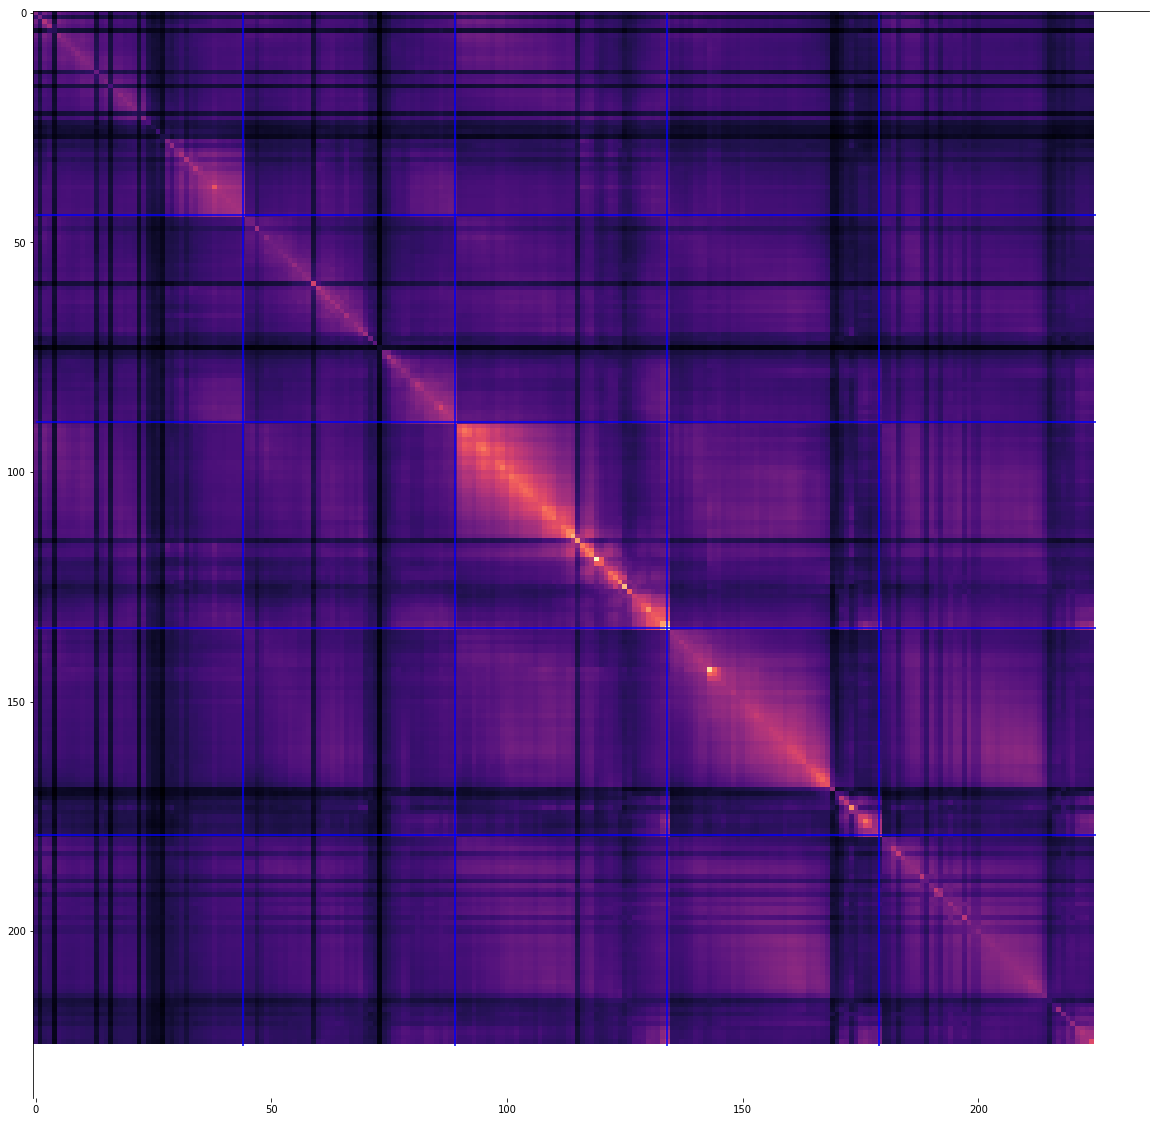

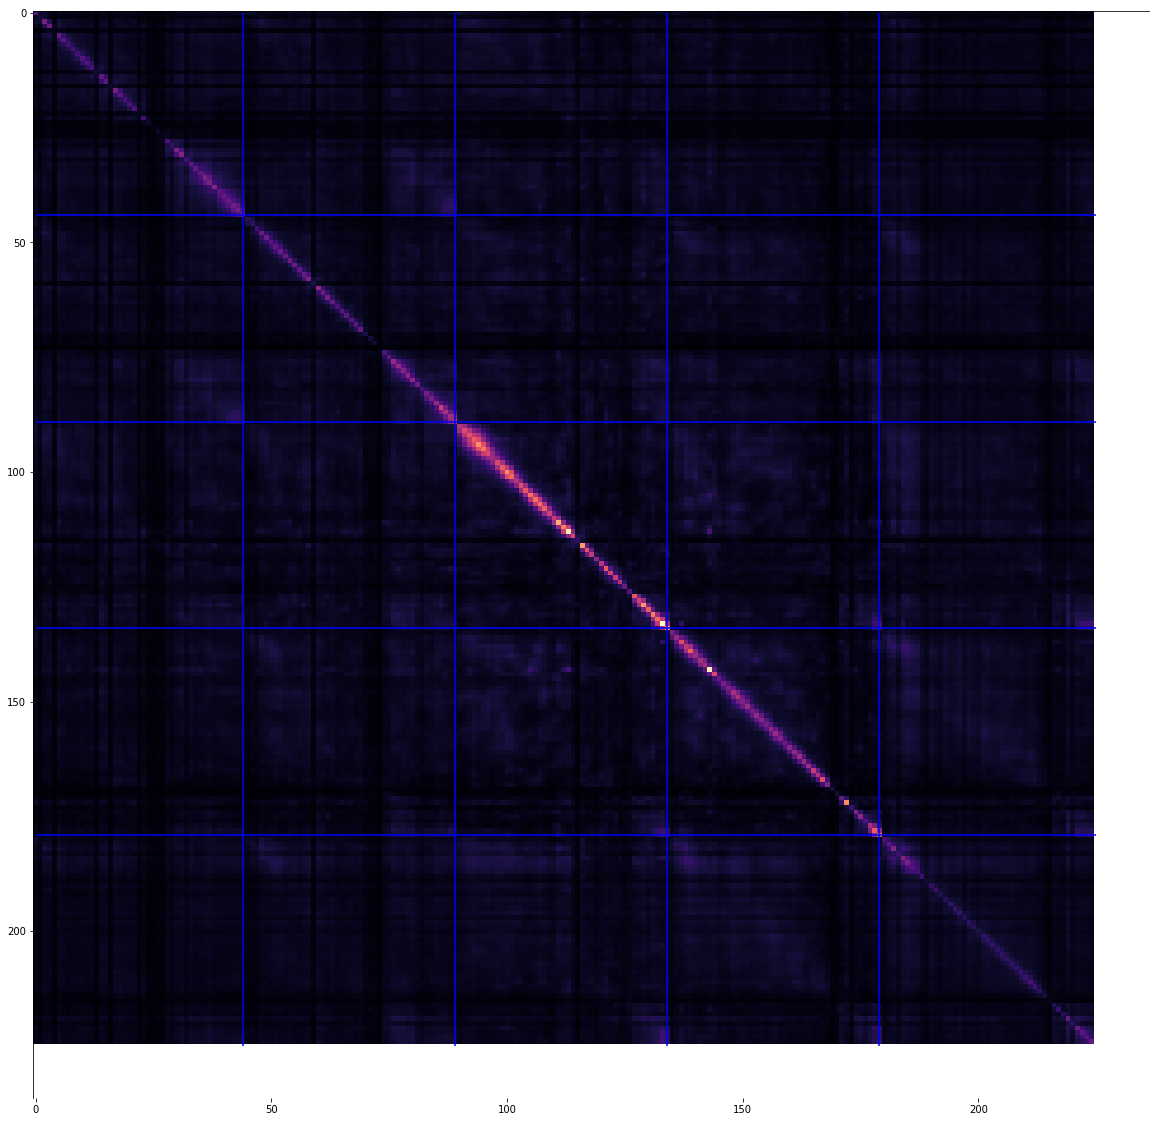

In [110]:
Sim_C = run_simmat(C,behav)
Sim_S = run_simmat(S_smooth,behav)

In [111]:
print(Sim_C.shape)
print(Sim_C.shape[0]/morphs_u.shape[0])

def SimMatContextMat(S,n):
    nBins = int(S.shape[0]/n)
    CMat = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            CMat[i,j] = S[nBins*i:nBins*(i+1)+1,nBins*j:nBins*(j+1)+1].ravel().mean()
    return CMat
        

(225, 225)
45.0


In [112]:
CMat_C = SimMatContextMat(Sim_C,5)
CMat_S = SimMatContextMat(Sim_S,5)
print(CMat_S.shape)

(5, 5)


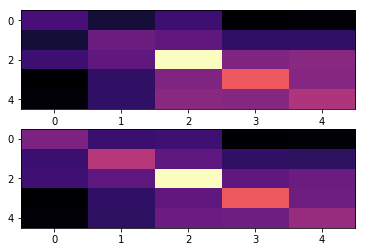

In [113]:
f,ax = plt.subplots(2,1)

ax[0].imshow(CMat_C,aspect='auto',cmap='magma')
ax[1].imshow(CMat_S,aspect='auto',cmap='magma')

In [102]:
# fraction of cells that place cells in context 0 but not context 1

# fraction of cells that place cells in context 1 but not context 0

# fraction of cells that are place cells in both

# fraction of place cells that place cells in both 

In [ ]:
# for cells that are place cells in both

# find displacement of place field 
# get distribution

# find those that are active in reward zones


In [ ]:
# if place cell in one of two extremes

# get magnitude of response in max pos +- 2 bins across morphs



